In [10]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import beam_analysis as ba

sys.path.append('/Users/46h/Research/code/accphys/pyorbit/measurement/')
from data_analysis import reconstruct

In [45]:
plot.rc['grid.alpha'] = 0.04

Form list of transfer matrices and measured moments.

In [46]:
npts = 12
moments_list = []
transfer_mats = []
for i in range(1, 13):
    for moments in np.loadtxt('_output/moments_{}.dat'.format(i)):
        moments_list.append(moments)
    for matrix_elements in np.loadtxt('_output/transfer_mat_elems_{}.dat'.format(i)):
        transfer_mats.append(matrix_elements.reshape((4, 4)))
moments_list = np.array(moments_list)
transfer_mats = np.array(transfer_mats)

Reconstruct $\Sigma$.

In [48]:
Sigma = reconstruct(transfer_mats, moments_list)
Sigma *= 1e6
print('Sigma:')
print(Sigma)
print('Emittances:', ba.apparent_emittances(Sigma))

Sigma:
[[ 1.54023373e+02  3.62004676e+01  5.50729353e-15  3.05305696e-16]
 [ 3.62004676e+01  1.16350854e+01  8.25446479e-16 -1.92439984e-18]
 [ 5.50729353e-15  8.25446479e-16  1.83910231e+02 -1.14078879e+01]
 [ 3.05305696e-16 -1.92439984e-18 -1.14078879e+01  3.22603483e+00]]
Emittances: (21.945414815809592, 21.521173347587588)


These aren't exactly what I put in, but they're close.

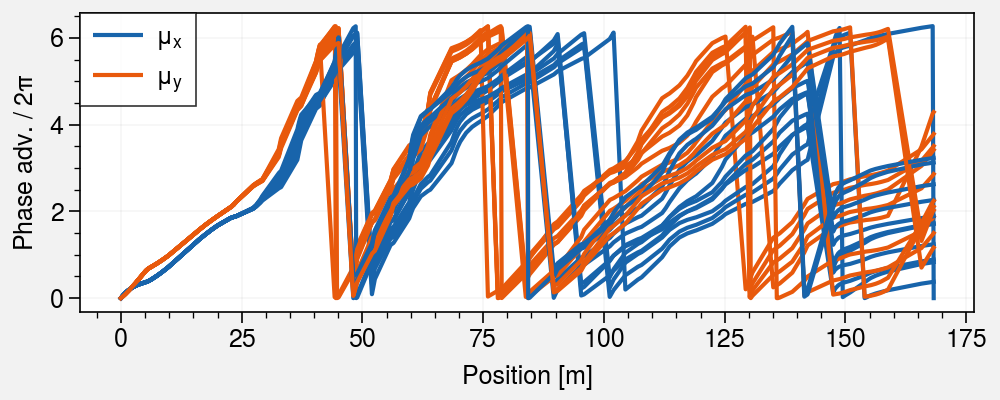

In [58]:
fig, axis = plot.subplots(figsize=(5, 2))
for i in range(1, 13):
    twiss = np.loadtxt('_output/twiss_{}.dat'.format(i))
    pos, mux, muy, ax, ay, bx, by, ex, ey = twiss.T
    axis.plot(pos, mux, color='blue9')
    axis.plot(pos, muy, color='orange8')
axis.legend(labels=[r'$\mu_x$', r'$\mu_y$'], ncols=1);
axis.format(ylabel=r'Phase adv. / 2$\pi$', xlabel='Position [m]')

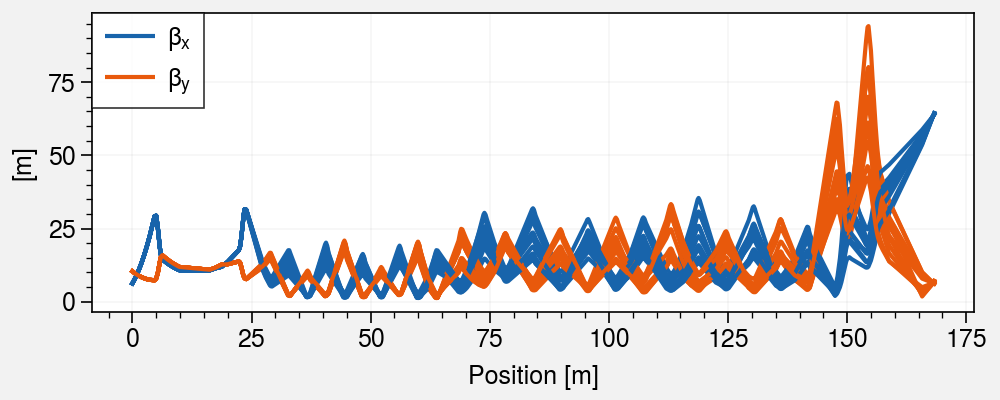

In [59]:
fig, axis = plot.subplots(figsize=(5, 2))
for i in range(1, 13):
    twiss = np.loadtxt('_output/twiss_{}.dat'.format(i))
    pos, mux, muy, ax, ay, bx, by, ex, ey = twiss.T
    axis.plot(pos, bx, color='blue9')
    axis.plot(pos, by, color='orange8')
axis.legend(labels=[r'$\beta_x$', r'$\beta_y$'], ncols=1);
axis.format(ylabel='[m]', xlabel='Position [m]')